# Tutorial on getting hands on the event data for a single match.
-----


*author: alihasankhan*

*twitter: @rockingAli5* 


# Import modules

In [1]:
# !git clone "https://github.com/Ali-Hasan-Khan/Scrape-Whoscored-Event-Data.git"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os

# Get match data

If you get the following exception, try running the cell again:<br>
`WebDriverException: Message: unknown error: cannot determine loading status
from no such window`

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1491995/Live/Spain-LaLiga-2020-2021-Barcelona-Sevilla"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2020/2021, Match Id: 1491995


# Calculate EPV for successful passes

In [3]:
events_df = main.addEpvToDataFrame(events_df)

# Get data for multiple matches

## getting competition urls

In [4]:
league_urls = main.getLeagueUrls()
league_urls

{'Premier League': 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League',
 'LaLiga': 'https://1xbet.whoscored.com/Regions/206/Tournaments/4/Spain-LaLiga',
 'Serie A': 'https://1xbet.whoscored.com/Regions/108/Tournaments/5/Italy-Serie-A',
 'Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/3/Germany-Bundesliga',
 'Champions League': 'https://1xbet.whoscored.com/Regions/250/Tournaments/12/Europe-Champions-League',
 'Europa League': 'https://1xbet.whoscored.com/Regions/250/Tournaments/30/Europe-Europa-League',
 'Ligue 1': 'https://1xbet.whoscored.com/Regions/74/Tournaments/22/France-Ligue-1',
 'Championship': 'https://1xbet.whoscored.com/Regions/252/Tournaments/7/England-Championship',
 'League One': 'https://1xbet.whoscored.com/Regions/252/Tournaments/8/England-League-One',
 'League Two': 'https://1xbet.whoscored.com/Regions/252/Tournaments/9/England-League-Two',
 'FA Cup': 'https://1xbet.whoscored.com/Regions/252/Tournaments/26/England-FA-Cup',
 '

## getting match urls for that competition and season

In [5]:
match_urls = main.getMatchUrls(comp_urls=league_urls, competition='LaLiga', season='2022/2023')
match_urls[:5]

[{'away': 'Sevilla',
  'date': 'Friday, Aug 12 2022',
  'home': 'Osasuna',
  'score': '2:1',
  'url': '/Matches/1650634/Live/Spain-LaLiga-Osasuna-Sevilla'},
 {'away': 'Villarreal',
  'date': 'Saturday, Aug 13 2022',
  'home': 'Real Valladolid',
  'score': '0:3',
  'url': '/Matches/1650637/Live/Spain-LaLiga-Real-Valladolid-Villarreal'},
 {'away': 'Rayo Vallecano',
  'date': 'Saturday, Aug 13 2022',
  'home': 'Barcelona',
  'score': '0:0',
  'url': '/Matches/1650630/Live/Spain-LaLiga-Barcelona-Rayo-Vallecano'},
 {'away': 'Espanyol',
  'date': 'Saturday, Aug 13 2022',
  'home': 'Celta Vigo',
  'score': '2:2',
  'url': '/Matches/1650632/Live/Spain-LaLiga-Celta-Vigo-Espanyol'},
 {'away': 'Girona',
  'date': 'Sunday, Aug 14 2022',
  'home': 'Valencia',
  'score': '1:0',
  'url': '/Matches/1650638/Live/Spain-LaLiga-Valencia-Girona'}]

## getting match urls for a specific team

In [6]:
team_urls = main.getTeamUrls(team='Barcelona', match_urls=match_urls)
team_urls[:5]

[{'away': 'Rayo Vallecano',
  'date': 'Saturday, Aug 13 2022',
  'home': 'Barcelona',
  'score': '0:0',
  'url': '/Matches/1650630/Live/Spain-LaLiga-Barcelona-Rayo-Vallecano'},
 {'away': 'Barcelona',
  'date': 'Sunday, Aug 21 2022',
  'home': 'Real Sociedad',
  'score': '1:4',
  'url': '/Matches/1650564/Live/Spain-LaLiga-Real-Sociedad-Barcelona'},
 {'away': 'Real Valladolid',
  'date': 'Sunday, Aug 28 2022',
  'home': 'Barcelona',
  'score': '4:0',
  'url': '/Matches/1650569/Live/Spain-LaLiga-Barcelona-Real-Valladolid'},
 {'away': 'Barcelona',
  'date': 'Saturday, Sep 03 2022',
  'home': 'Sevilla',
  'score': '0:3',
  'url': '/Matches/1650582/Live/Spain-LaLiga-Sevilla-Barcelona'},
 {'away': 'Barcelona',
  'date': 'Saturday, Sep 10 2022',
  'home': 'Cadiz',
  'score': '0:4',
  'url': '/Matches/1650597/Live/Spain-LaLiga-Cadiz-Barcelona'}]

## getting match data for the required urls

In [7]:
# eg. first 5 matches of Barcelona
matches_data = main.getMatchesData(match_urls=team_urls[:5])

Getting Match Data: 100%|██████████| 5/5 [01:10<00:00, 14.05s/it]


## getting events dataframe for required matches

In [8]:
events_ls = [main.createEventsDF(match) for match in matches_data]
# Add EPV column
events_list = [main.addEpvToDataFrame(match) for match in events_ls]
events_dfs = pd.concat(events_list)
events_dfs.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.445619e+09,2,0,0.0,64,a,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
1,2.445619e+09,2,0,0.0,65,h,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
2,2.445619e+09,3,0,0.0,64,a,49.8,49.7,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0018
3,2.445619e+09,4,0,1.0,64,a,42.9,46.7,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,0.0191
4,2.445619e+09,5,0,5.0,64,a,74.9,74.4,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,NaN


## saving events as csv

In [9]:
events_dfs.to_csv('data/events.csv')

# Get pass data for a team

## All passes 

In [10]:
# Team data (from match data of single match)
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Get Player Names for home team
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']].iloc[0][0]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[events_df['type']=='Pass'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['outcomeType']=='Successful'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.219390e+09,3,0,0.0,65,h,50.0,50.0,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0015
1,2.219390e+09,4,0,1.0,65,h,39.6,47.5,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0007
2,2.219390e+09,5,0,3.0,65,h,40.5,62.4,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0027
3,2.219390e+09,6,0,6.0,65,h,29.1,64.4,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0005
4,2.219390e+09,7,0,7.0,65,h,25.0,40.0,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0018


## Passes cut into different durations

In [11]:
# Cut in 2
first_half_passes = passes_df.loc[passes_df['period']=='FirstHalf']
second_half_passes = passes_df.loc[passes_df['period']=='SecondHalf'].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.219390e+09,3,0,0.0,65,h,50.0,50.0,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0015
1,2.219390e+09,4,0,1.0,65,h,39.6,47.5,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0007
2,2.219390e+09,5,0,3.0,65,h,40.5,62.4,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0027
3,2.219390e+09,6,0,6.0,65,h,29.1,64.4,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0005
4,2.219390e+09,7,0,7.0,65,h,25.0,40.0,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0018


# Get pass visualisations

## All passes

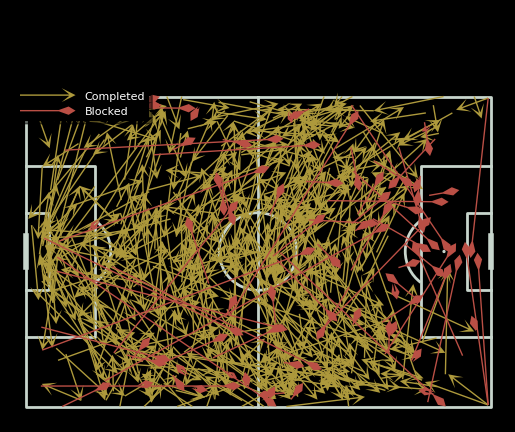

In [12]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## Successful box passes

AttributeError: LineCollection.set() got an unexpected keyword argument 'opp_comet'

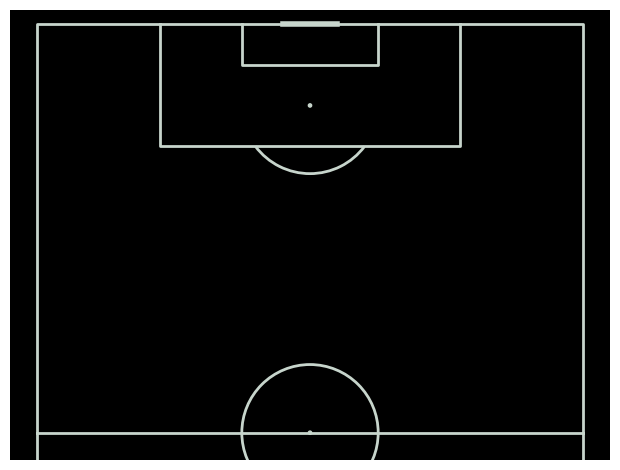

In [13]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# You can select more cmaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# opp_transparent/opp_comet are manually added by me to this visual, you can change it in visuals.py
# If you get an error regarding 'opp_transparent/opp_comet' you probably haven't replaced pitch.py/linecollection.py file
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## All passes network

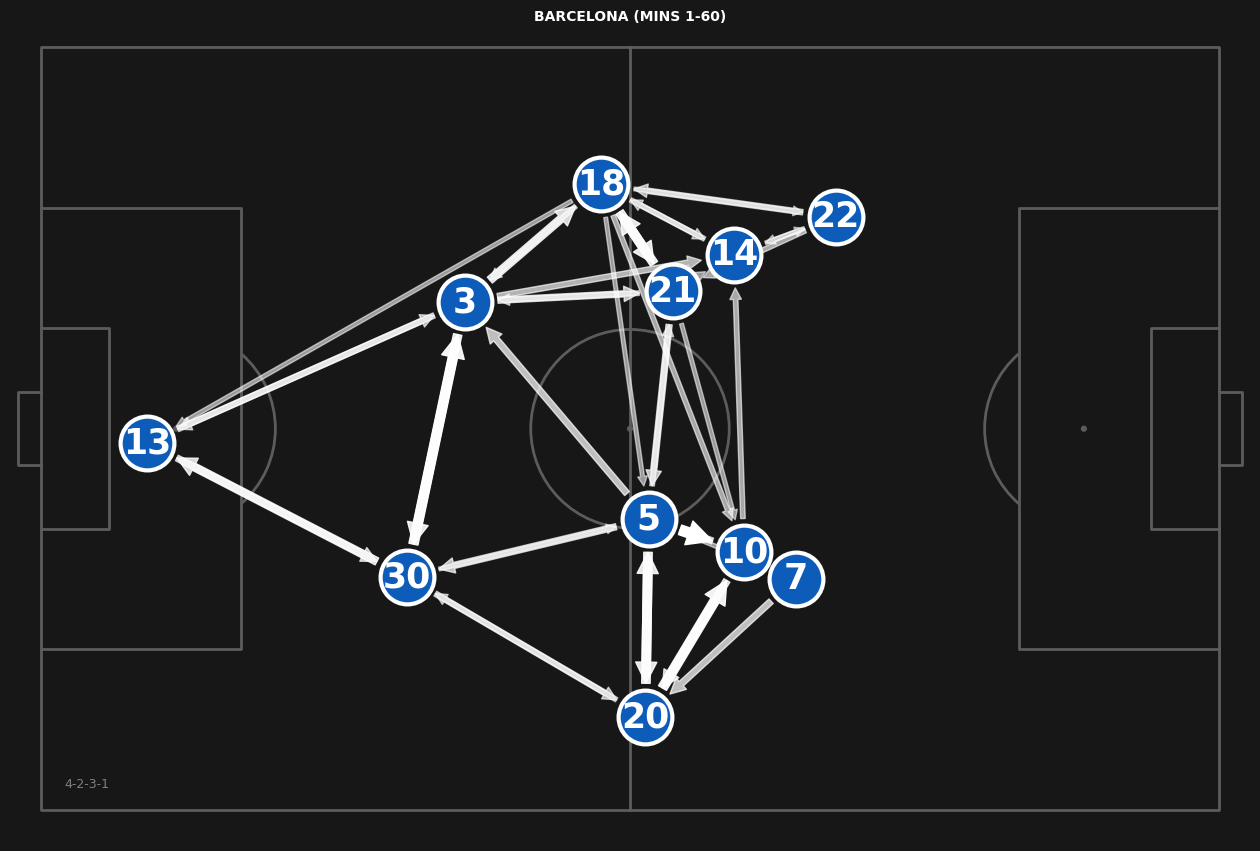

In [15]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Pass Network     
# you can change marker_label to 'name' as well
fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                           marker_size=1500, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba',
                           marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

## Progressive passes network

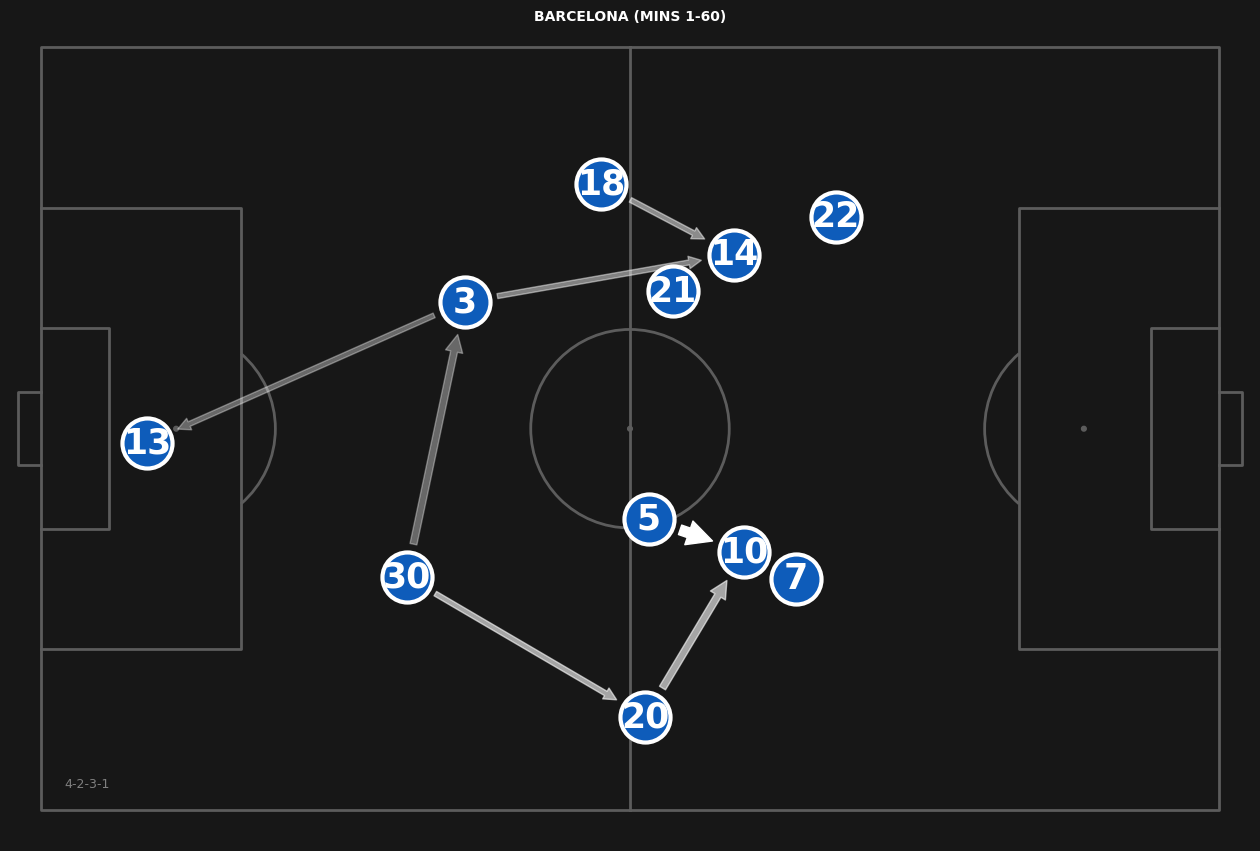

In [14]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Create Progressive Pass Network
# you can change marker_label to 'name' as well
fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createAttPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                              marker_size=1300, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba', 
                              marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

# Get shotmap

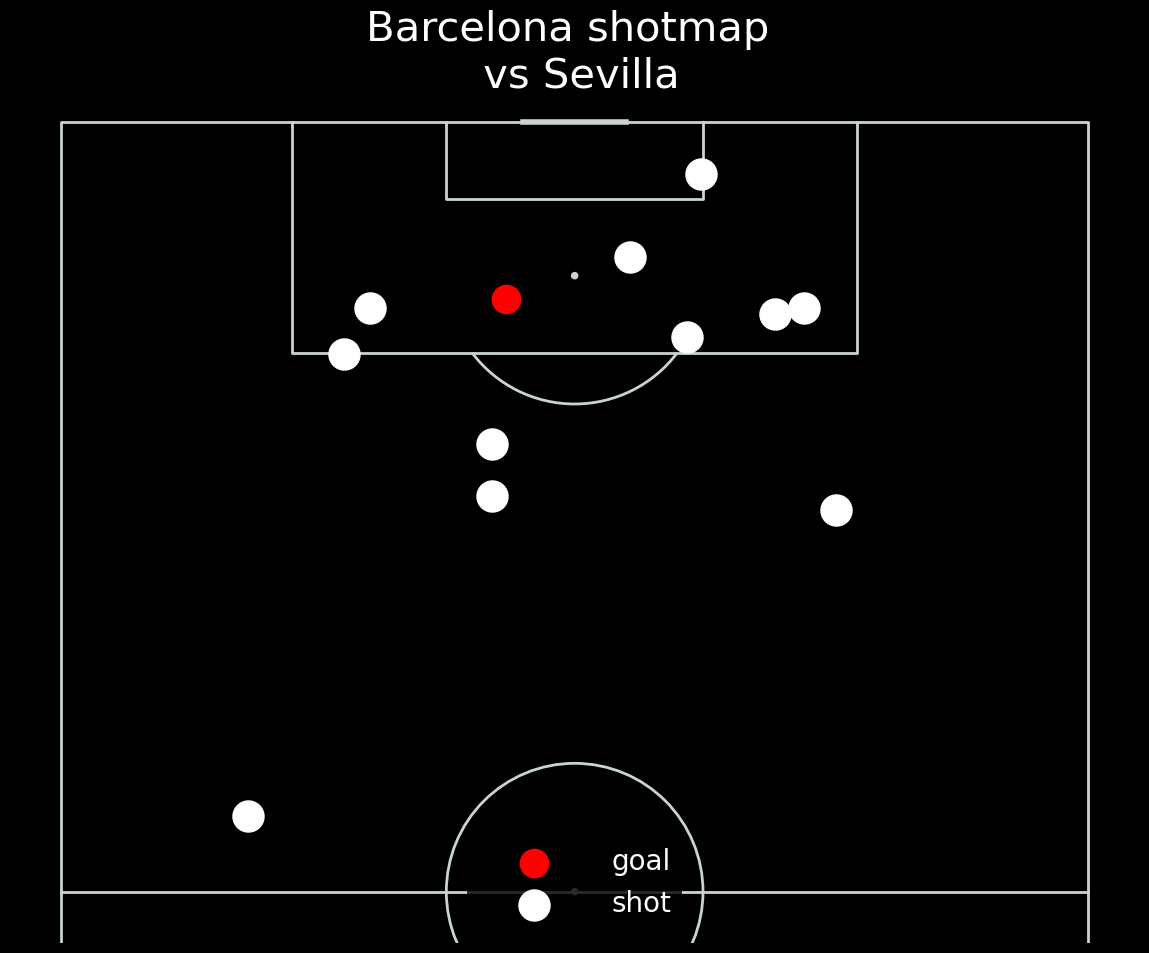

In [15]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

fig,ax = plt.subplots(figsize=(16,11))
visuals.createShotmap(match_data, events_df, team='Barcelona', pitchcolor='black', shotcolor='white', 
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=500, fig=fig, ax=ax)

# Get PV formation map

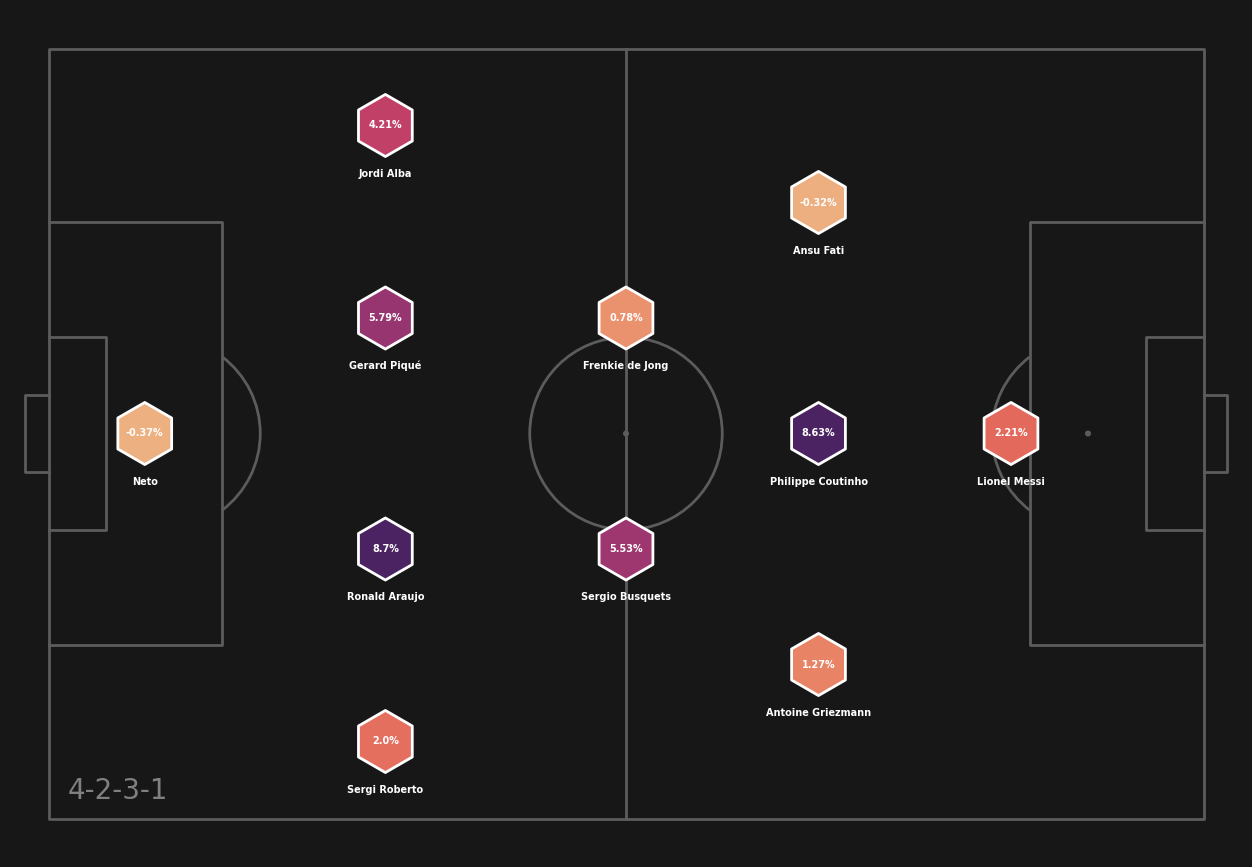

In [16]:
# Team data
team = 'Barcelona'
teamId = 65
opponent = 'Sevilla'
venue = 'home'

# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createPVFormationMap(match_data, events_df, team='Barcelona', color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='h', markersize=2000, markeredgewidth=2, labelsize=7, labelcolor='w', ax=ax)